# Survival Rate

## Analysis Completeness Data

In [29]:
import pandas as pd

# Baca file CSV
cycles_df = pd.read_csv('Data/cycles.csv')
harvests_df = pd.read_csv('Data/harvests.csv')
mortalities_df = pd.read_csv('Data/mortalities.csv')

# Fungsi untuk menganalisis kelengkapan data
def analyze_completeness(df, name):
    total_rows = len(df)
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / total_rows) * 100
    
    print(f"\nAnalisis Kelengkapan Data: {name}")
    print(f"Total baris: {total_rows}")
    print("\nKolom dengan data yang hilang:")
    for column, count in missing_data[missing_data > 0].items():
        print(f"{column}: {count} baris ({missing_percentage[column]:.2f}%)")
    
    print("\nInformasi tambahan:")
    print(df.info())

# Analisis kelengkapan untuk setiap DataFrame
analyze_completeness(cycles_df, "Cycles")
analyze_completeness(harvests_df, "Harvests")
analyze_completeness(mortalities_df, "Mortalities")


Analisis Kelengkapan Data: Cycles
Total baris: 2617

Kolom dengan data yang hilang:
species_id: 814 baris (31.10%)
finished_at: 1 baris (0.04%)
remark: 1281 baris (48.95%)
initial_age: 48 baris (1.83%)
limit_weight_per_area: 7 baris (0.27%)
target_cultivation_day: 3 baris (0.11%)
target_size: 4 baris (0.15%)
ordered_at: 1523 baris (58.20%)
hatchery_id: 465 baris (17.77%)
total_seed_type: 242 baris (9.25%)
hatchery_name: 465 baris (17.77%)
pond_length: 6 baris (0.23%)
pond_width: 6 baris (0.23%)
pond_depth: 118 baris (4.51%)

Informasi tambahan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2617 non-null   int64  
 1   pond_id                 2617 non-null   int64  
 2   species_id              1803 non-null   float64
 3   total_seed              2617 non-null   int64  
 4   started_at        

In [30]:
import pandas as pd
import numpy as np

# Analysis untuk size dan weight dalam harvests_df
print("Analysis of size and weight in harvests:")
print(harvests_df[['size', 'weight']].describe())

# Analysis cycle_id dalam semua DataFrames
print("\nUnique cycle_id counts:")
print(f"cycles_df: {cycles_df['id'].nunique()}")
print(f"harvests_df: {harvests_df['cycle_id'].nunique()}")
print(f"mortalities_df: {mortalities_df['cycle_id'].nunique()}")

# Hitung total_harvested per cycle
harvests_df['total_harvested'] = harvests_df['size'] * harvests_df['weight']
total_harvested = harvests_df.groupby('cycle_id')['total_harvested'].sum().reset_index()
print("\nAnalysis of total_harvested:")
print(total_harvested['total_harvested'].describe())

# Analysis total_seed dalam cycles_df
print("\nAnalysis of total_seed:")
print(cycles_df['total_seed'].describe())

# Hitung total_mortalities per cycle
total_mortalities = mortalities_df.groupby('cycle_id')['quantity'].sum().reset_index()
print("\nAnalysis of total_mortalities:")
print(total_mortalities['quantity'].describe())

Analysis of size and weight in harvests:
               size         weight
count   8087.000000    8087.000000
mean     113.803389     774.636121
std      381.149658    4266.747605
min       10.000000       0.000000
25%       60.000000      47.970000
50%       86.000000     250.000000
75%      125.000000     667.695000
max    20000.000000  250000.000000

Unique cycle_id counts:
cycles_df: 2500
harvests_df: 2490
mortalities_df: 857

Analysis of total_harvested:
count    2.490000e+03
mean     1.916957e+05
std      9.771078e+05
min      0.000000e+00
25%      4.141773e+04
50%      1.066967e+05
75%      2.264345e+05
max      4.000000e+07
Name: total_harvested, dtype: float64

Analysis of total_seed:
count    2.617000e+03
mean     2.197552e+05
std      1.710980e+05
min      1.000000e+01
25%      9.600000e+04
50%      1.943920e+05
75%      3.000000e+05
max      1.800000e+06
Name: total_seed, dtype: float64

Analysis of total_mortalities:
count    8.570000e+02
mean     2.830315e+04
std      3.

## 1. Survival Rate

Formula:

SR = (nP / nT) * 100%

Dimana:
- SR = Survival Rate (%)
- nP = Jumlah udang yang dipanen
- nT = Jumlah udang yang ditebar awal

Survival Rate (SR) adalah persentase udang yang bertahan hidup dari awal penebaran hingga panen. Formula ini membandingkan jumlah udang yang berhasil dipanen dengan jumlah udang yang ditebar di awal siklus budidaya, kemudian dikalikan 100% untuk mendapatkan persentase. Semakin tinggi nilai SR, semakin baik tingkat kelangsungan hidup udang selama masa budidaya.

In [31]:
import pandas as pd

# Baca file CSV
harvests_df = pd.read_csv('Data\harvests.csv')
cycles_df = pd.read_csv('Data\cycles.csv')

# Hitung total udang panen per siklus
harvests_df['total_shrimp'] = harvests_df['size'] * harvests_df['weight']
total_per_siklus = harvests_df.groupby('cycle_id')['total_shrimp'].sum().reset_index()
total_per_siklus.columns = ['id', 'total_harvested']

# Gabungkan dengan data siklus
merged_df = cycles_df.merge(total_per_siklus, on='id', how='left')

# Hitung tingkat kelangsungan hidup
merged_df['survival_rate'] = (merged_df['total_harvested'] / merged_df['total_seed']) * 100

# Pilih kolom yang relevan dan urutkan berdasarkan id siklus
hasil = merged_df[['id', 'total_seed', 'total_harvested', 'survival_rate']].sort_values('id')

# Tampilkan hasil
print(hasil)

         id  total_seed  total_harvested  survival_rate
1939   3458      566669        444548.02      78.449328
2277   3459      566669        440387.88      77.715188
1371   4036      172250        154350.00      89.608128
152    4038      350000        405078.84     115.736811
1301   4039      210000        219808.62     104.670771
...     ...         ...              ...            ...
1785  29619       70000        137250.00     196.071429
424   29659       75000         12000.00      16.000000
2468  29679       26671         32187.00     120.681639
2076  29873      125000         88230.00      70.584000
1253  29874      125000         46305.00      37.044000

[2617 rows x 4 columns]


#### Preprocessing Data

Langkah-langkah pra-pemrosesan:
1. Hapus baris data jika:
   - total_harvested = 0
   - total_harvested = NaN

2. Batasi nilai survival_rate:
   - Jika survival_rate > 100, ubah menjadi 100. Hal ini dilakukan dengan asumsi bahwa Survival Rate maksimal adalah 100%

In [32]:
# Hapus baris dengan total_harvested == 0 atau NaN
hasil = hasil.dropna(subset=['total_harvested'])
hasil = hasil[merged_df['total_harvested'] != 0]

# Batasi survival_rate maksimum 100%
hasil['survival_rate'] = hasil['survival_rate'].clip(upper=100)

# Pilih kolom yang relevan dan urutkan berdasarkan id siklus
hasil = hasil[['id', 'total_seed', 'total_harvested', 'survival_rate']].sort_values('id')

# Tampilkan hasil
print(hasil)

         id  total_seed  total_harvested  survival_rate
1939   3458      566669        444548.02      78.449328
2277   3459      566669        440387.88      77.715188
1371   4036      172250        154350.00      89.608128
152    4038      350000        405078.84     100.000000
1301   4039      210000        219808.62     100.000000
...     ...         ...              ...            ...
1785  29619       70000        137250.00     100.000000
424   29659       75000         12000.00      16.000000
2468  29679       26671         32187.00     100.000000
2076  29873      125000         88230.00      70.584000
1253  29874      125000         46305.00      37.044000

[2595 rows x 4 columns]


C:\Users\mmasa\AppData\Local\Temp\ipykernel_18048\2478394527.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hasil = hasil[merged_df['total_harvested'] != 0]


In [33]:
hasil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2595 entries, 1939 to 1253
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2595 non-null   int64  
 1   total_seed       2595 non-null   int64  
 2   total_harvested  2595 non-null   float64
 3   survival_rate    2595 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 101.4 KB


### Analisis detail anomali Survival Rate

In [34]:
import pandas as pd

def detail_sr(cycle_id):
    cycles_df = pd.read_csv('Data\cycles.csv')
    harvests_df = pd.read_csv('Data\harvests.csv')
    mortalities_df = pd.read_csv('Data\mortalities.csv')

    # Menampilkan data dengan cycle_id yang diberikan
    total_seed = cycles_df.loc[cycles_df['id'] == cycle_id, 'total_seed'].values[0]
    harvest_data = harvests_df.loc[harvests_df['cycle_id'] == cycle_id, ['size', 'weight']]

    # Hitung total shrimp untuk cycle_id yang diberikan
    total_harvested_shrimp = (harvest_data['size'] * harvest_data['weight']).sum()

    # Ambil data mortality, jika tidak ada maka set ke 0
    mortality_data = mortalities_df.loc[mortalities_df['cycle_id'] == cycle_id, ['quantity', 'average_weight']]
    total_mortality = mortality_data['quantity'].sum() if not mortality_data.empty else 0

    # Hitung survival rate
    survival_rate = (total_harvested_shrimp / total_seed) * 100 if total_seed != 0 else 0

    print(f"Total seed : {total_seed}")
    print(f"size and weight : \n{harvest_data}")
    print(f"Total harvested shrimp : {total_harvested_shrimp}")
    print(f"Total mortality : {total_mortality}")
    print(f"Survival rate : {survival_rate:.2f}%")

    return {
        'total_seed': total_seed,
        'harvest_data': harvest_data,
        'total_harvested_shrimp': total_harvested_shrimp,
        'total_mortality': total_mortality,
        'survival_rate': survival_rate
    }

# Analisis SR detail
detail_hasil = detail_sr(4036)

Total seed : 172250
size and weight : 
       size  weight
5366  350.0   271.0
5367  350.0   170.0
Total harvested shrimp : 154350.0
Total mortality : 0
Survival rate : 89.61%


In [35]:
# Analisis SR detail : SR lebih dari 100%
# Cycle ID : 29619
detail_hasil = detail_sr(29619)

Total seed : 70000
size and weight : 
       size  weight
7828  215.0   150.0
7829  150.0   700.0
Total harvested shrimp : 137250.0
Total mortality : 0
Survival rate : 196.07%


In [36]:
# Analisis SR detail : Data harvested tidak ada
# Cycle ID : 22269
detail_hasil = detail_sr(22269)

Total seed : 362712
size and weight : 
      size  weight
454  588.0     0.0
Total harvested shrimp : 0.0
Total mortality : 0
Survival rate : 0.00%


### Buat Plot Sebaran Survival Rate

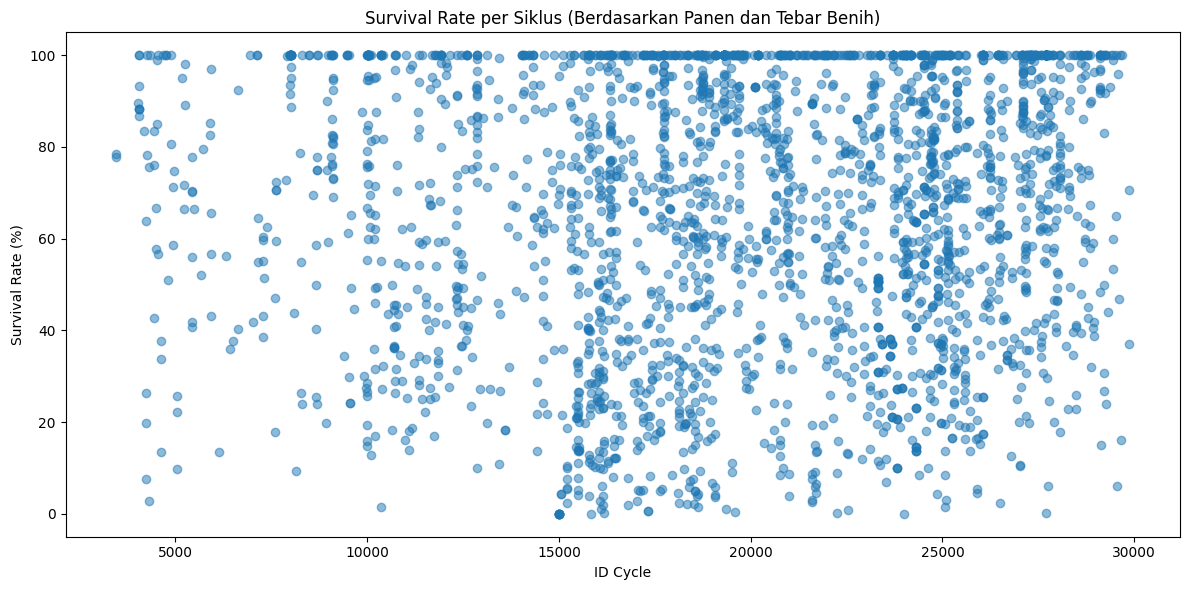

count    2595.000000
mean       65.502420
std        29.412754
min         0.000910
25%        41.658869
50%        70.218954
75%        93.713217
max       100.000000
Name: survival_rate, dtype: float64
Results saved to 'result_sr_1.csv'


In [37]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(hasil['id'], hasil['survival_rate'], alpha=0.5)

# Menambahkan label dan judul
plt.xlabel('ID Cycle')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate per Siklus (Berdasarkan Panen dan Tebar Benih)')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan statistik deskriptif
print(hasil['survival_rate'].describe())

# Save results to CSV
hasil.to_csv('result_sr_1.csv', index=False)
print("Results saved to 'result_sr_1.csv'")

## 2. Alternatif Survival Rate

Formula:

SR = ((nT - nM) / nT) * 100%

Dimana:
- SR = Survival Rate (%)
- nT = Jumlah udang yang ditebar awal
- nM = Jumlah udang yang mati (mortality)

Survival Rate (SR) adalah persentase udang yang diperkirakan bertahan hidup dari awal penebaran hingga panen. Formula ini menghitung selisih antara jumlah udang yang ditebar di awal dengan jumlah udang yang mati selama masa budidaya, dibagi dengan jumlah tebar awal, kemudian dikalikan 100% untuk mendapatkan persentase. 

Metode ini menggunakan data mortalitas langsung, yang dapat memberikan estimasi survival rate yang lebih akurat sepanjang siklus budidaya. Semakin tinggi nilai SR, semakin baik tingkat kelangsungan hidup udang selama masa budidaya.

Perbedaan utama dengan metode sebelumnya adalah penggunaan data mortalitas langsung alih-alih data panen, yang memungkinkan pemantauan survival rate secara real-time selama siklus budidaya berlangsung.

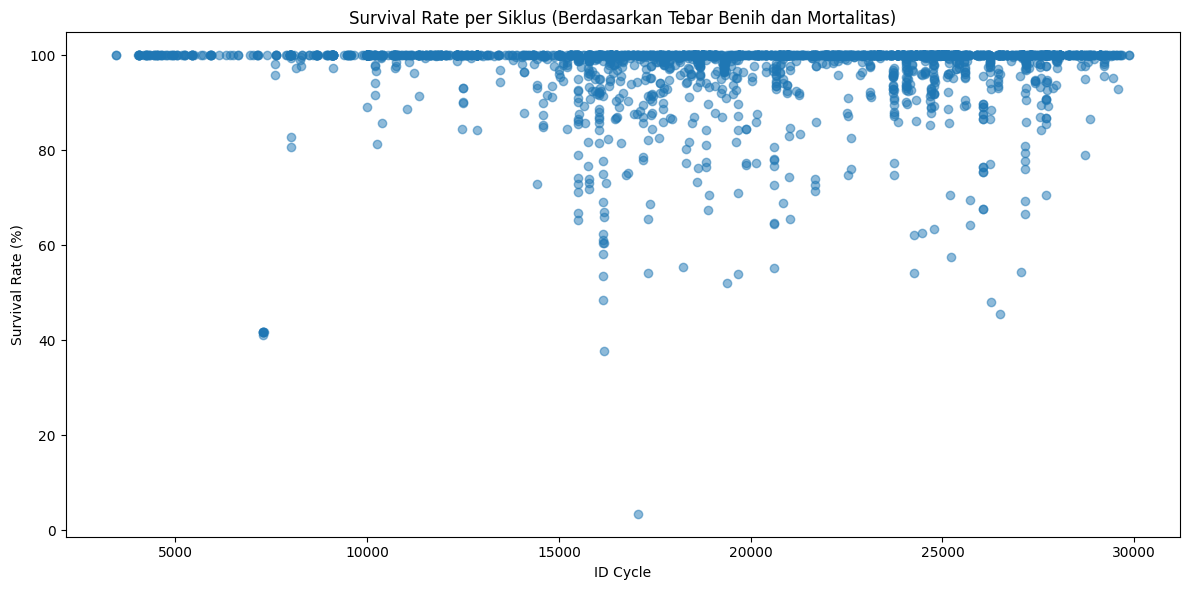

count    2609.000000
mean       97.465893
std         7.266867
min         3.453370
25%        99.065656
50%       100.000000
75%       100.000000
max       100.000000
Name: survival_rate, dtype: float64
         id  total_seed  total_mortalities  survival_rate
1939   3458      566669                0.0          100.0
2277   3459      566669                0.0          100.0
1371   4036      172250                0.0          100.0
152    4038      350000                0.0          100.0
1301   4039      210000                0.0          100.0
...     ...         ...                ...            ...
1785  29619       70000                0.0          100.0
424   29659       75000                0.0          100.0
2468  29679       26671                0.0          100.0
2076  29873      125000                0.0          100.0
1253  29874      125000                0.0          100.0

[2609 rows x 4 columns]
Results saved to 'result_sr_2.csv'


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV yang diperlukan
cycles_df = pd.read_csv('Data/cycles.csv')
mortalities_df = pd.read_csv('Data/mortalities.csv')

# Hitung total kematian per siklus
total_mortalities_per_cycle = mortalities_df.groupby('cycle_id')['quantity'].sum().reset_index()
total_mortalities_per_cycle.columns = ['id', 'total_mortalities']

# Gabungkan dengan data siklus
merged_df = cycles_df.merge(total_mortalities_per_cycle, on='id', how='left')

# Isi nilai NaN dengan 0 untuk siklus tanpa data kematian
merged_df['total_mortalities'] = merged_df['total_mortalities'].fillna(0)

# Hitung survival rate
merged_df['survival_rate'] = ((merged_df['total_seed'] - merged_df['total_mortalities']) / merged_df['total_seed']) * 100

# Pilih kolom yang relevan dan urutkan berdasarkan id siklus
result = merged_df[['id', 'total_seed', 'total_mortalities', 'survival_rate']].sort_values('id')

# Hapus entri dengan survival rate negatif
result = result[result['survival_rate'] >= 0]

# Buat scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(result['id'], result['survival_rate'], alpha=0.5)
plt.xlabel('ID Cycle')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate per Siklus (Berdasarkan Tebar Benih dan Mortalitas)')
plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif
print(result['survival_rate'].describe())

# Tampilkan hasil
print(result)

# Save results to CSV
hasil.to_csv('result_sr_2.csv', index=False)
print("Results saved to 'result_sr_2.csv'")


In [39]:
result.describe()

,id,total_seed,total_mortalities,survival_rate
count,2609.000000,2.609000e+03,2609.000000,2609.000000
mean,19908.062093,2.201293e+05,5272.898045,97.465893
std,6013.475991,1.709823e+05,17692.657033,7.266867
min,3458.000000,1.000000e+02,0.000000,3.453370
25%,16091.000000,9.600000e+04,0.000000,99.065656
50%,20408.000000,1.956700e+05,0.000000,100.000000
75%,24814.000000,3.000000e+05,1429.000000,100.000000
max,29874.000000,1.800000e+06,431324.000000,100.000000


# Average Daily Gain (ADG)

### Average Daily Gain (ADG)

Average Daily Gain (ADG) adalah metrik penting dalam budidaya udang yang mengukur pertambahan berat harian rata-rata. ADG memberikan informasi berharga tentang laju pertumbuhan udang selama periode tertentu.



#### Perhitungan ADG

Untuk menghitung ADG, kita perlu terlebih dahulu menghitung Average Body Weight (ABW):

1. Formula ABW:


   ABW = Total berat udang (gram) / Jumlah udang sampel


2. Formula ADG:


   ADG = (ABW akhir - ABW awal) / Jumlah hari


   Di mana:
   - ADG: Average Daily Gain (Pertambahan Berat Harian Rata-rata)
   - ABW akhir: Berat badan rata-rata pada akhir periode
   - ABW awal: Berat badan rata-rata pada awal periode
   - Jumlah hari: Selisih hari antara pengukuran awal dan akhir



Dengan memahami dan memantau ADG, pembudidaya dapat mengambil keputusan yang lebih baik dalam manajemen tambak, yang pada akhirnya dapat meningkatkan produktivitas dan profitabilitas usaha budidaya udang.

### Handling outlier data

In [40]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('Data/samplings.csv')

# Konversi kolom sampled_at ke tipe datetime dengan format yang fleksibel
df['sampled_at'] = pd.to_datetime(df['sampled_at'], format='mixed', dayfirst=True)

# Urutkan data berdasarkan cycle_id dan sampled_at
df = df.sort_values(['cycle_id', 'sampled_at'])

# Hitung ADG per cycle
adg_per_cycle = df.groupby('cycle_id').apply(lambda x: (x['average_weight'].iloc[-1] - x['average_weight'].iloc[0]) / (x['sampled_at'].iloc[-1] - x['sampled_at'].iloc[0]).days)

# Buat DataFrame baru dengan hasil ADG per cycle
result = pd.DataFrame({
    'cycle_id': adg_per_cycle.index,
    'ADG': adg_per_cycle.values,
    'start_date': df.groupby('cycle_id')['sampled_at'].first(),
    'end_date': df.groupby('cycle_id')['sampled_at'].last(),
    'start_weight': df.groupby('cycle_id')['average_weight'].first(),
    'end_weight': df.groupby('cycle_id')['average_weight'].last()
})

result['duration_days'] = (result['end_date'] - result['start_date']).dt.days

# Ambil outlier dengan duration_days > 200
outliers = result[result['duration_days'] > 200]

# Tampilkan hasil outlier
print("Outliers (duration_days > 200):")
print(outliers)

# Hitung persentase outliers
percentage_outliers = (len(outliers) / len(result)) * 100
print(f"\nPersentase outliers: {percentage_outliers:.2f}%")

C:\Users\mmasa\AppData\Local\Temp\ipykernel_18048\3627554160.py:13: RuntimeWarning: invalid value encountered in double_scalars
  adg_per_cycle = df.groupby('cycle_id').apply(lambda x: (x['average_weight'].iloc[-1] - x['average_weight'].iloc[0]) / (x['sampled_at'].iloc[-1] - x['sampled_at'].iloc[0]).days)
C:\Users\mmasa\AppData\Local\Temp\ipykernel_18048\3627554160.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  adg_per_cycle = df.groupby('cycle_id').apply(lambda x: (x['average_weight'].iloc[-1] - x['average_weight'].iloc[0]) / (x['sampled_at'].iloc[-1] - x['sampled_at'].iloc[0]).days)


Outliers (duration_days > 200):
          cycle_id       ADG start_date   end_date  start_weight  end_weight  \
cycle_id                                                                       
6126.0      6126.0  0.026316 2020-11-05 2021-06-02          3.50        9.00   
18760.0    18760.0  0.034065 2020-01-26 2021-03-02          8.86       22.52   
25134.0    25134.0  0.001425 2001-01-01 2023-11-11          5.72       17.62   

          duration_days  
cycle_id                 
6126.0              209  
18760.0             401  
25134.0            8349  

Persentase outliers: 0.13%


C:\Users\mmasa\AppData\Local\Temp\ipykernel_18048\3627554160.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adg_per_cycle = df.groupby('cycle_id').apply(lambda x: (x['average_weight'].iloc[-1] - x['average_weight'].iloc[0]) / (x['sampled_at'].iloc[-1] - x['sampled_at'].iloc[0]).days)


In [41]:
# Buang outlier dari dataset
result_without_outliers = result[result['duration_days'] <= 200]

# Simpan hasil tanpa outlier ke CSV
result_without_outliers.to_csv('adg_results.csv', index=False)
print("Results without outliers saved to 'adg_results_without_outliers.csv'")

# Tampilkan statistik deskriptif dari data tanpa outlier
print("\nStatistik deskriptif data tanpa outlier:")
print(result_without_outliers.describe())

# Hitung persentase data yang tersisa
percentage_remaining = (len(result_without_outliers) / len(result)) * 100
print(f"\nPersentase data yang tersisa: {percentage_remaining:.2f}%")

Results without outliers saved to 'adg_results_without_outliers.csv'

Statistik deskriptif data tanpa outlier:
           cycle_id          ADG                  start_date  \
count   2304.000000  1904.000000                        2304   
mean   20073.753906         -inf  2022-12-23 16:44:22.500000   
min     3458.000000         -inf         2020-04-10 00:00:00   
25%    16293.750000     0.185714         2022-06-22 00:00:00   
50%    20395.500000     0.247698         2023-01-14 00:00:00   
75%    24881.250000     0.310620         2023-09-10 06:00:00   
max    29874.000000     2.066667         2024-04-02 00:00:00   
std     5792.011683          NaN                         NaN   

                         end_date  start_weight   end_weight  duration_days  
count                        2304   2304.000000  2304.000000    2304.000000  
mean   2023-01-30 09:58:07.500000      4.002036    13.538320      37.717882  
min           2020-06-02 00:00:00      0.010000     0.010000       0.000000  


c:\Users\mmasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


### ADG Analysis

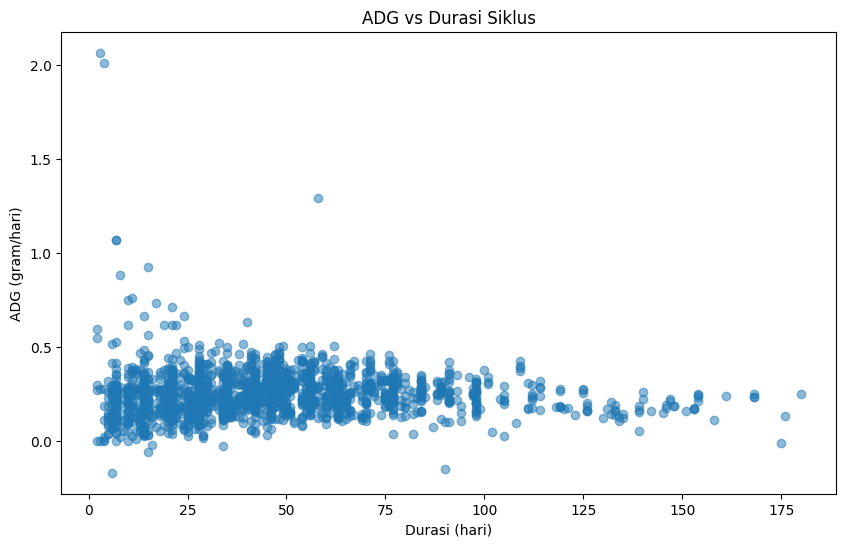

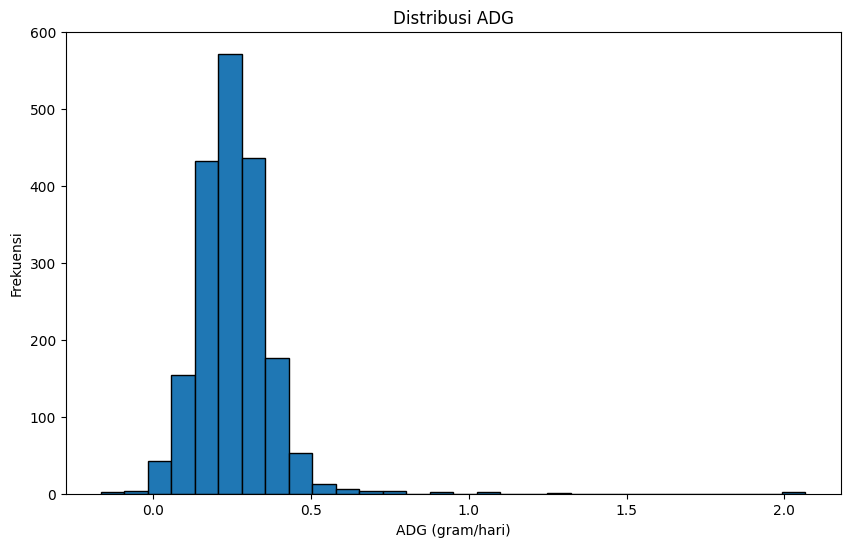

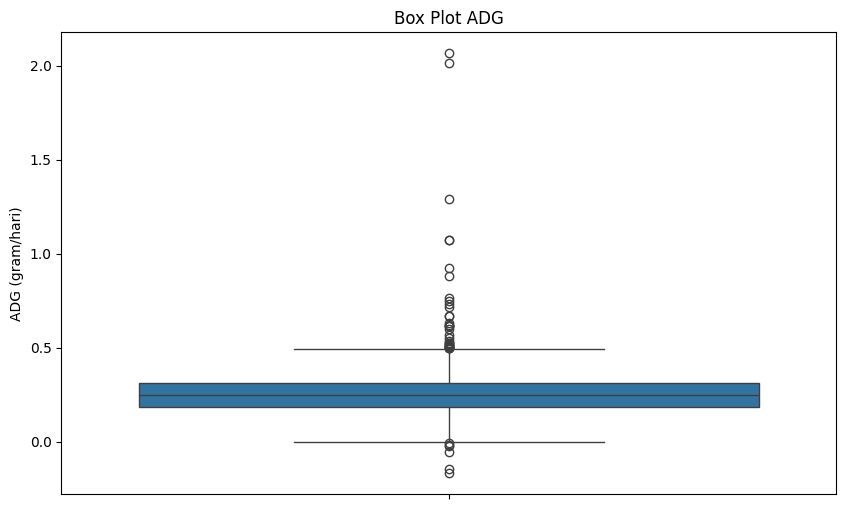

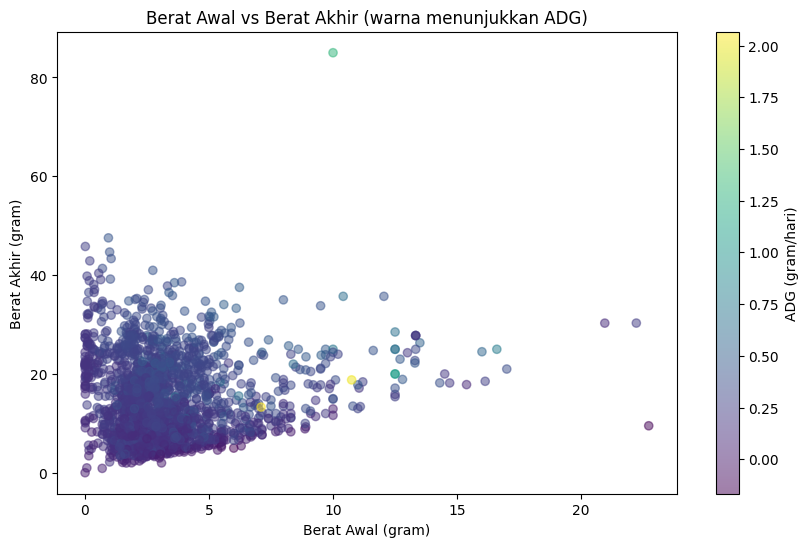

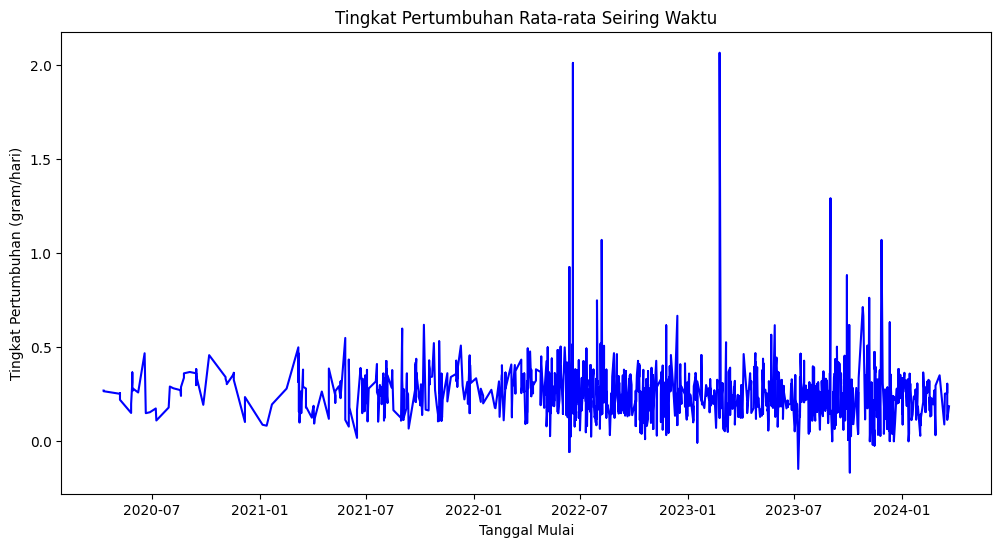


Statistik deskriptif ADG:
count    1903.000000
mean        0.253815
std         0.123436
min        -0.166667
25%         0.185857
50%         0.247778
75%         0.310699
max         2.066667
Name: ADG, dtype: float64


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Baca hasil ADG yang telah disimpan sebelumnya
result = pd.read_csv('adg_results.csv')

# Konversi kolom tanggal ke tipe datetime
result['start_date'] = pd.to_datetime(result['start_date'])
result['end_date'] = pd.to_datetime(result['end_date'])

# Bersihkan data ADG
result['ADG'] = pd.to_numeric(result['ADG'], errors='coerce')
result = result.dropna(subset=['ADG'])
result = result[np.isfinite(result['ADG'])]

# Plot 1: Scatter plot ADG vs Duration
plt.figure(figsize=(10, 6))
plt.scatter(result['duration_days'], result['ADG'], alpha=0.5)
plt.xlabel('Durasi (hari)')
plt.ylabel('ADG (gram/hari)')
plt.title('ADG vs Durasi Siklus')
plt.show()

# Plot 2: Histogram ADG
plt.figure(figsize=(10, 6))
plt.hist(result['ADG'], bins=30, range=(result['ADG'].min(), result['ADG'].max()), edgecolor='black')
plt.xlabel('ADG (gram/hari)')
plt.ylabel('Frekuensi')
plt.title('Distribusi ADG')
plt.show()

# Plot 3: Box plot ADG
plt.figure(figsize=(10, 6))
sns.boxplot(y=result['ADG'])
plt.ylabel('ADG (gram/hari)')
plt.title('Box Plot ADG')
plt.show()

# Plot 4: Scatter plot Start Weight vs End Weight dengan warna berdasarkan ADG
plt.figure(figsize=(10, 6))
scatter = plt.scatter(result['start_weight'], result['end_weight'], c=result['ADG'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='ADG (gram/hari)')
plt.xlabel('Berat Awal (gram)')
plt.ylabel('Berat Akhir (gram)')
plt.title('Berat Awal vs Berat Akhir (warna menunjukkan ADG)')
plt.show()

# Plot 5: Line plot pertumbuhan rata-rata
plt.figure(figsize=(12, 6))
result['growth_rate'] = (result['end_weight'] - result['start_weight']) / result['duration_days']
result = result.sort_values('start_date')
plt.plot(result['start_date'], result['growth_rate'], 'b-')
plt.xlabel('Tanggal Mulai')
plt.ylabel('Tingkat Pertumbuhan (gram/hari)')
plt.title('Tingkat Pertumbuhan Rata-rata Seiring Waktu')
plt.show()

# Tampilkan statistik deskriptif ADG
print("\nStatistik deskriptif ADG:")
print(result['ADG'].describe())